# Final Project
Dataset             :  Bank marketing campaigns dataset | Opening Deposit </br>
Disusun Oleh    :  Roberto Benedict & Gretty Margaretha</br>
Kelas                 :  JCDSOL-013(B)

## A. Business Problem Understanding

**Context :**  
Bank marketing campaigns dataset analysis - Opening a Term Deposit dataset is a dataset describing a Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.

If after all marketing efforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Target y (term): 

* 0 : no, disagree to place deposit
* 1 : yes, agree to place deposit

**Problem Statement :**

The marketing process can consume significant time and resources if the bank targets all potential clients without prior filtering or targeted marketing, resulting in wasted time and resources. The bank wants to increase marketing efficiency by identifying which potential clients are likely to agree to open a term deposit account.

**Goals :**
1. Identify client feature patterns for the most probable potential clients:
    * Most important features correlated with the target
    * Seasonality
    * Socio-economic conditions
2. Minimize promotion costs

Based on these issues, the bank aims to predict the likelihood of a client agreeing to open a term deposit account. This can support the bank in executing marketing strategies focused on clients most likely to be interested, thereby saving costs, time, and resources.

Additionally, the bank wants to understand the factors influencing a client's decision to open a term deposit account or not, enabling them to develop better plans for approaching potential clients.

**Analytic Approach :**

Our approach will involve analyzing the data to discover patterns that distinguish clients who are likely to open a term deposit account from those who are not. 

Then, a classification model will be developed to help the bank predict the probability of a client wanting to open a term deposit account.

**Metric Evaluation :**

![img](Image/confusion_matrix.png)

* **Type I error (False Positive)** : Predicting a client will open a term deposit when they actually won't  
  **Consequence**: Wasted resources, time, and costs due to targeting uninterested clients.

* **Type II error (False Negative)** : Predicting a client won't open a term deposit when they actually will  
  **Consequence**: Losing potential clients who might have opened a term deposit.

Given these consequences, it is crucial to develop a model that minimizes promotion costs for the company without increasing the number of missed opportunities (false negatives). Therefore, we aim for as many correct positive predictions as possible while reducing false negatives, and also considering false positives to avoid wasted expenses. Based on these considerations, the primary metric to use will be chosen between the **F2-score** or **ROC-AUC**.

**Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## B. Data Understanding

Dataset source : [bank-additional-full.csv](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/data)

Note : 
- Regarding missing Attribute Values, there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

### Attribute Information

**Bank Client Data**
| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| age | numeric | Ratio | Age of the client |
| job | categorical | Nominal | Type of job (e.g., "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| marital | categorical | Nominal | Marital status (e.g., "divorced","married","single","unknown") |
| education | categorical | Nominal | Education level (e.g., "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") |
| default | categorical | Nominal | Has credit in default? (e.g., "no","yes","unknown") |
| housing | categorical | Nominal | Has housing loan? (e.g., "no","yes","unknown") |
| loan | categorical | Nominal | Has personal loan? (e.g., "no","yes","unknown") |

**Related with the Last Contact of the Current Campaign**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| contact | categorical | Nominal | Contact communication type (e.g., "cellular","telephone") |
| month | categorical | Nominal | Last contact month of year (e.g., "jan", "feb", "mar", …, "nov", "dec") |
| day_of_week | categorical | Nominal | Last contact day of the week (e.g., "mon","tue","wed","thu","fri") |
| duration | numeric | Ratio | Last contact duration, in seconds |

**Other Attributes**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| campaign | numeric | Ratio | Number of contacts performed during this campaign and for this client |
| pdays | numeric | Ratio | Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | numeric | Ratio | Number of contacts performed before this campaign and for this client |
| poutcome | categorical | Nominal | Outcome of the previous marketing campaign (e.g., "failure","nonexistent","success") |

**Social and Economic Context Attributes**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| emp.var.rate | numeric | Ratio | Employment variation rate - quarterly indicator |
| cons.price.idx | numeric | Ratio | Consumer price index - monthly indicator |
| cons.conf.idx | numeric | Ratio | Consumer confidence index - monthly indicator |
| euribor3m | numeric | Ratio | Euribor 3 month rate - daily indicator |
| nr.employed | numeric | Ratio | Number of employees - quarterly indicator |

**Output Variable**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| y | binary | Nominal | Has the client subscribed a term deposit? (e.g., "yes","no") |


In [2]:
dataset = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [3]:
df = dataset.copy()

In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [75]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [76]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,0,0.0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,0,0.0,3,"[no, unknown, yes]"
5,housing,object,0,0.0,3,"[no, yes, unknown]"
6,loan,object,0,0.0,3,"[no, yes, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,0,0.0,5,"[mon, tue, wed, thu, fri]"


## C. Data Cleaning

### Missing Values

In [77]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Duplicated

In [78]:
print(f'Duplicated : {df.duplicated().sum()}')
print(f'Percent Duplicated : {round(df.duplicated().sum()/len(df)*100,2)} %')

Duplicated : 12
Percent Duplicated : 0.03 %


In [79]:
dupSuspect = df.duplicated(keep=False)

In [80]:
dfCheck = df[dupSuspect].sort_values(by=list(df.columns),axis=0)
display(dfCheck.head(2),dfCheck.tail(2))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38255,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [81]:
df = df.drop_duplicates()

### Handling Unknown

In [82]:
listItem = []
for col_name in df.columns:
    listItem.append([col_name, f"{len(df[df[col_name]=='unknown'])} of {len(df)}", f"{round(len(df[df[col_name]=='unknown'])/len(df)*100,2)} %"
    ])

dfUnknown = pd.DataFrame(columns=['Column Name', 'Unknown Count', 'Unknown Percentage'], data=listItem)
dfUnknown

,Column Name,Unknown Count,Unknown Percentage
0,age,0 of 41176,0.0 %
1,job,330 of 41176,0.8 %
2,marital,80 of 41176,0.19 %
3,education,1730 of 41176,4.2 %
4,default,8596 of 41176,20.88 %
5,housing,990 of 41176,2.4 %
6,loan,990 of 41176,2.4 %
7,contact,0 of 41176,0.0 %
8,month,0 of 41176,0.0 %
9,day_of_week,0 of 41176,0.0 %


1. `Job` : Could be dropped
2. `Marital` : Could be dropped
3. `Education` : Could be dropped
4. `Default` : Not dropped, could imply no prior credit history
5. `Housing` : Could be dropped
6. `Loan` : Could be dropped

In [83]:
col_select = ['job','marital','education','housing','loan']
prevLen = len(df)
df = df[~df[col_select].isin(['unknown']).any(axis=1)]
print(f"Removed rows : {prevLen-len(df)}")
print(f"Removed rows Percentage : {round((prevLen-len(df))/prevLen*100,2)} %")

Removed rows : 2942
Removed rows Percentage : 7.14 %


### Handling Outliers

C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppData\Local\Temp\ipykernel_23432\1762461403.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ROB_b\AppDa

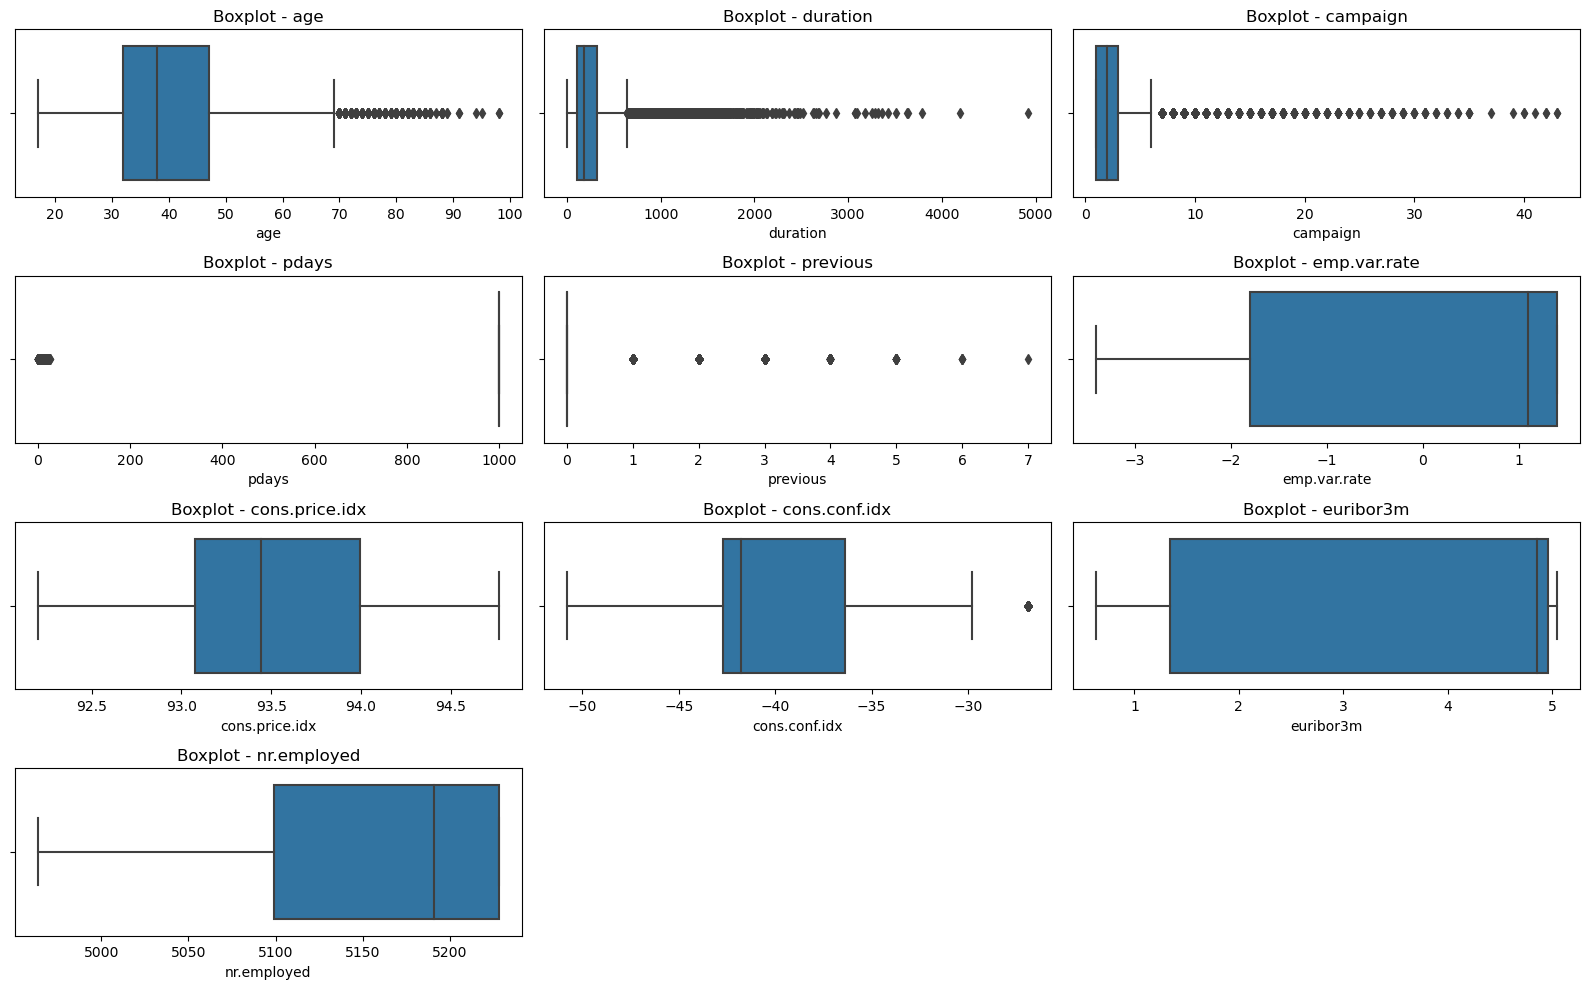

In [85]:
col_names = list(df.select_dtypes(include='number').columns)
iterPlt = 1
plt.figure(figsize=(16,10))

for col in col_names:
    plt.subplot(4,3, iterPlt)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

    iterPlt += 1

Outliers of Client description like `age` will not be deleted because the feature describes the client directly. Then, campaign description values such as `duration` and `campaign` are still reasonable due to the values outside of the IQR whiskers are still  clumped closely instead of certain extreme outliers. On the other hand, `pdays` and `previous` are integers describing days and number of times respectively which both have extreme skewness but the values causing them indicate special meanings. Value of 999 in `pdays` means the client was not previously contacted, while the value 0 in `previous` also means there was no prior contact. Lastly, the features related to socio-economic conditions have no extreme outliers and the values describe the actual condition when the campaign call was made for the specific client and are based on external data from the central bank of the Portuguese Republic statistical website.

## D. Data Analysis

## E. Modeling and Evaluation